In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from random import sample
gdf = pd.read_excel('Social Network Dataset.xlsx',sheet_name=['Elements','Connections'])


In [3]:
ef = gdf['Elements']

In [4]:
cf = gdf['Connections']

In [5]:
cf.head()

,From,To,Type,Weight,When
0,S-c1b610,S-7d9053,Other,1.0,2012.0
1,S-4985b3,S-e7dad4,School,1.0,2015.0
2,S-376418,S-ab3070,School,1.0,2012.0
3,S-d00f38,S-6e1f64,School,1.0,2016.0
4,S-e538e3,S-596786,Other,1.0,1994.0


In [6]:
import networkx as nx

In [7]:
# edge_col = ['Type','Weight','When']
graph = nx.from_pandas_edgelist(cf,source='From',target='To',edge_attr=True)

In [8]:
from random import sample
sample_edges = sample(graph.edges,10)

C:\Users\kaito\AppData\Local\Temp\ipykernel_2028\3484872415.py:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sample_edges = sample(graph.edges,10)


In [9]:
# type(graph.edges(data=True))
list(graph.edges(data=True))[0:10]

[('S-c1b610', 'S-7d9053', {'Type': 'Other', 'Weight': 1.0, 'When': 2012.0}),
 ('S-c1b610', 'S-44af64', {'Type': 'School', 'Weight': 1.0, 'When': 2014.0}),
 ('S-c1b610', 'S-9f98f3', {'Type': 'Other', 'Weight': 0.8, 'When': 2012.0}),
 ('S-c1b610', 'S-507abd', {'Type': 'School', 'Weight': 0.8, 'When': 2017.0}),
 ('S-c1b610', 'S-e94481', {'Type': nan, 'Weight': 0.4, 'When': 2017.0}),
 ('S-c1b610', 'S-7fddba', {'Type': nan, 'Weight': 0.6, 'When': 2012.0}),
 ('S-c1b610', 'S-17d15e', {'Type': nan, 'Weight': 0.4, 'When': 2017.0}),
 ('S-c1b610', 'S-5c36a0', {'Type': nan, 'Weight': 0.4, 'When': 2016.0}),
 ('S-c1b610', 'S-66ffdc', {'Type': nan, 'Weight': 0.2, 'When': 2017.0}),
 ('S-c1b610', 'S-a47614', {'Type': nan, 'Weight': 0.2, 'When': 2017.0})]

In [10]:
ef.head()

,Label,Type,School (ID),Answered the form
0,S-c1b610,Student,27,Yes
1,S-4985b3,Student,25,Yes
2,S-376418,Student,67,Yes
3,S-d00f38,Student,24,Yes
4,S-e538e3,Student,30,Yes


In [11]:
node_dict = ef.set_index('Label').to_dict('index')
nx.set_node_attributes(graph,values=node_dict)

In [12]:
list(graph.nodes(data=True))[0:2]

[('S-c1b610',
  {'Type': 'Student', 'School (ID)': 27, 'Answered the form': 'Yes'}),
 ('S-7d9053',
  {'Type': 'Student', 'School (ID)': 49, 'Answered the form': 'No'})]

# Task 2 Draw Network

In [13]:
# See what layouts are available in networkX
[x for x in nx.__dir__() if x.endswith('_layout')]

['bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout',
 'arf_layout']

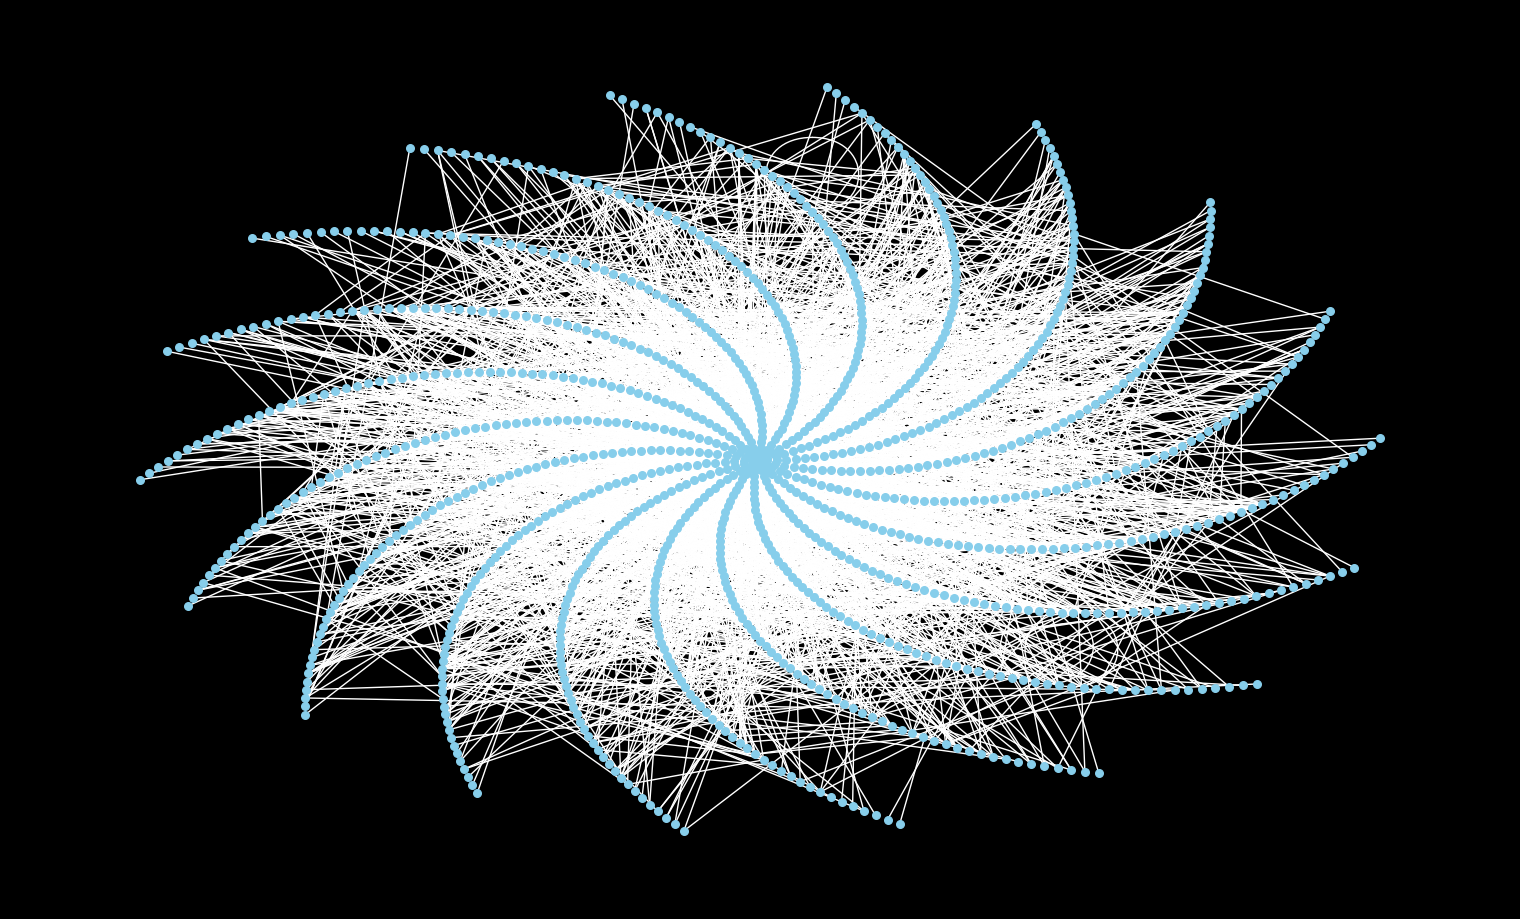

In [14]:
import matplotlib.pyplot as plt
import numpy as np
colors = np.linspace(0,1,len(graph.nodes))
fig = plt.figure(figsize=(15,9))
pos = nx.spiral_layout(graph)
nx.draw(graph,pos=pos,node_size=30,edge_color='white',node_color='skyblue')
fig.set_facecolor('black')

# Task 3 Centrality

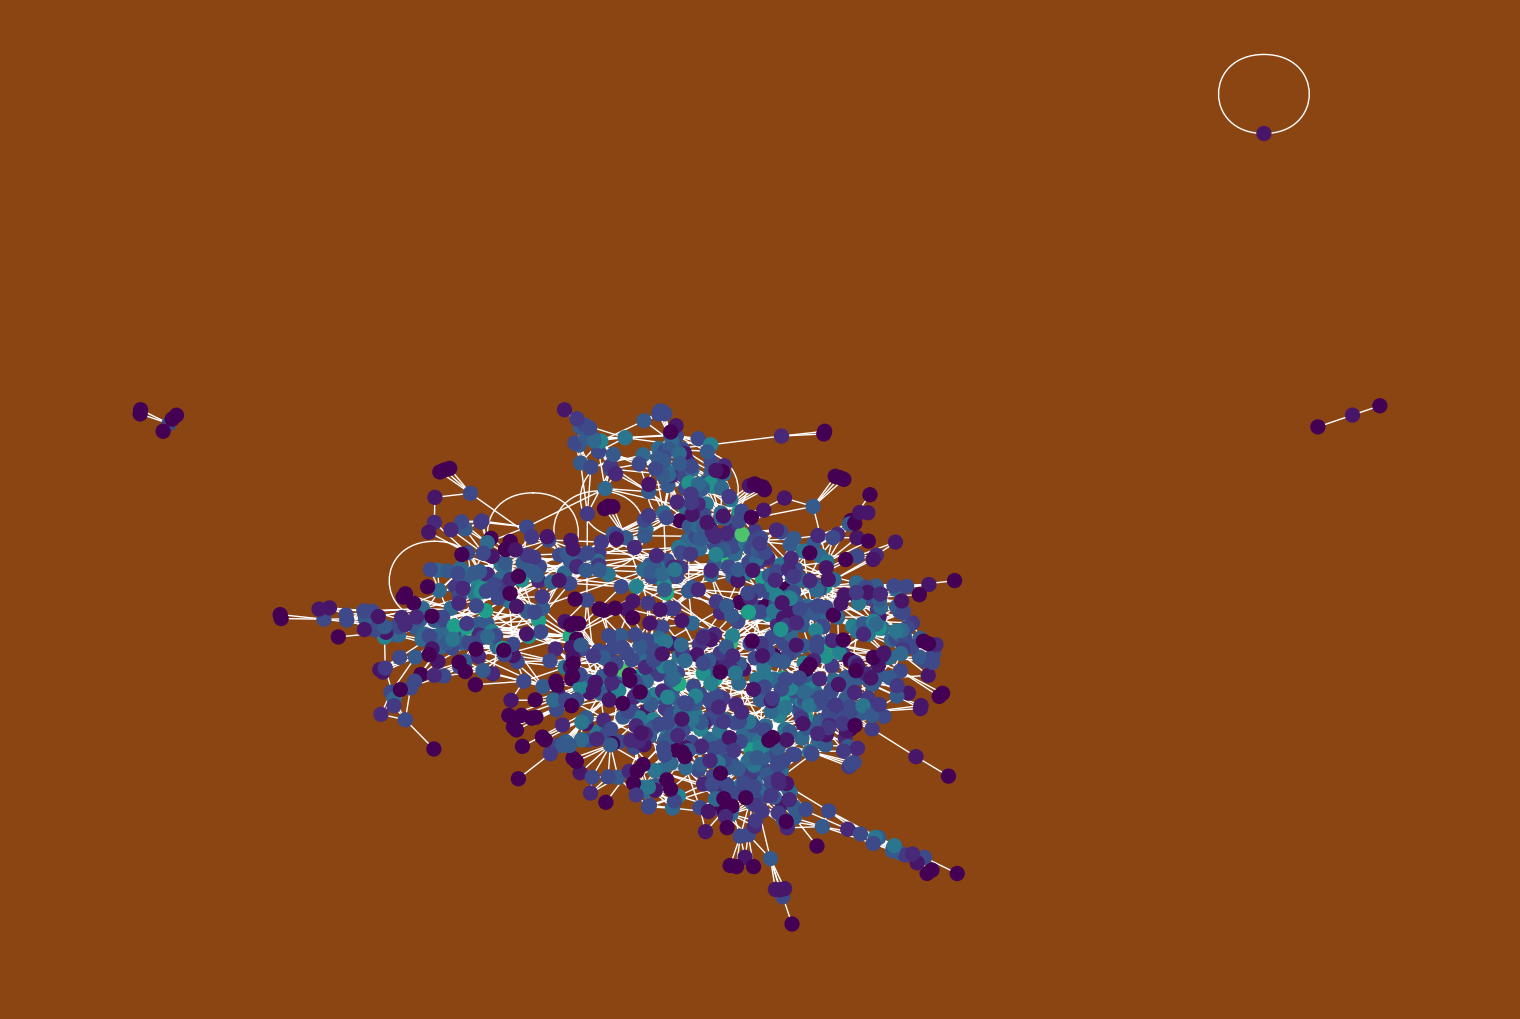

In [15]:
fig = plt.figure(figsize=(15, 10))

centrality = nx.degree_centrality(graph)
colors = list(centrality.values())

nx.draw(graph, 
        node_size=100,
        node_color=colors,
        edge_color='white')
fig.set_facecolor('SaddleBrown')

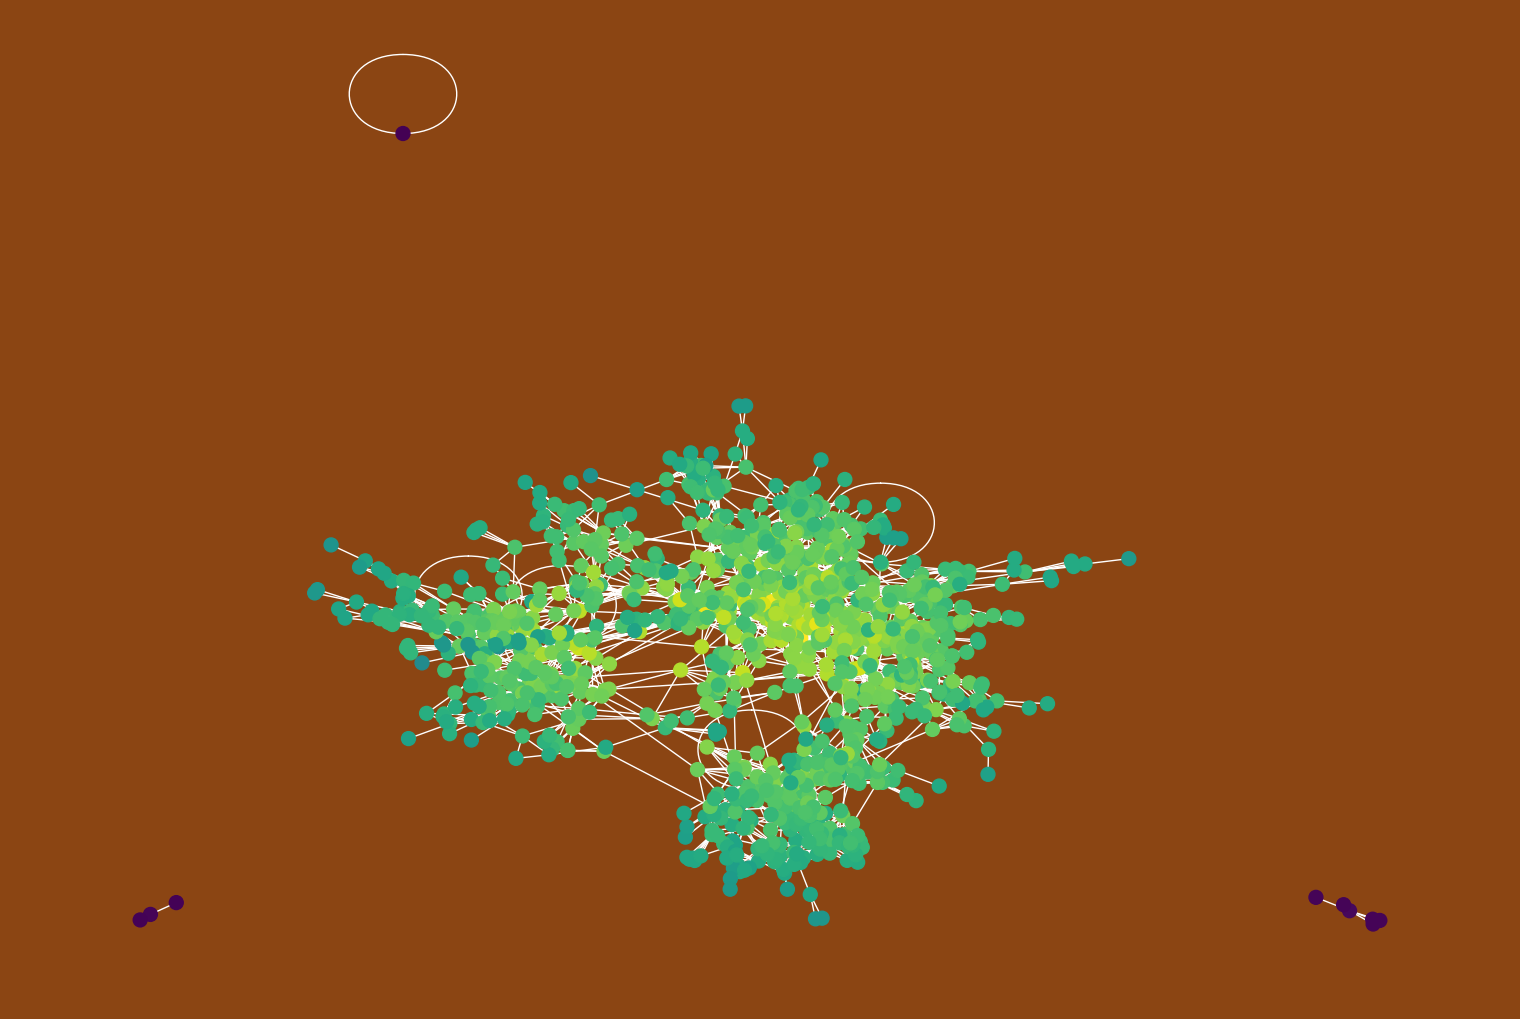

In [16]:
fig = plt.figure(figsize=(15, 10))

centrality = nx.closeness_centrality(graph)
colors = list(centrality.values())

nx.draw(graph, 
        node_size=100,
        node_color=colors,
        edge_color='white')
fig.set_facecolor('SaddleBrown')

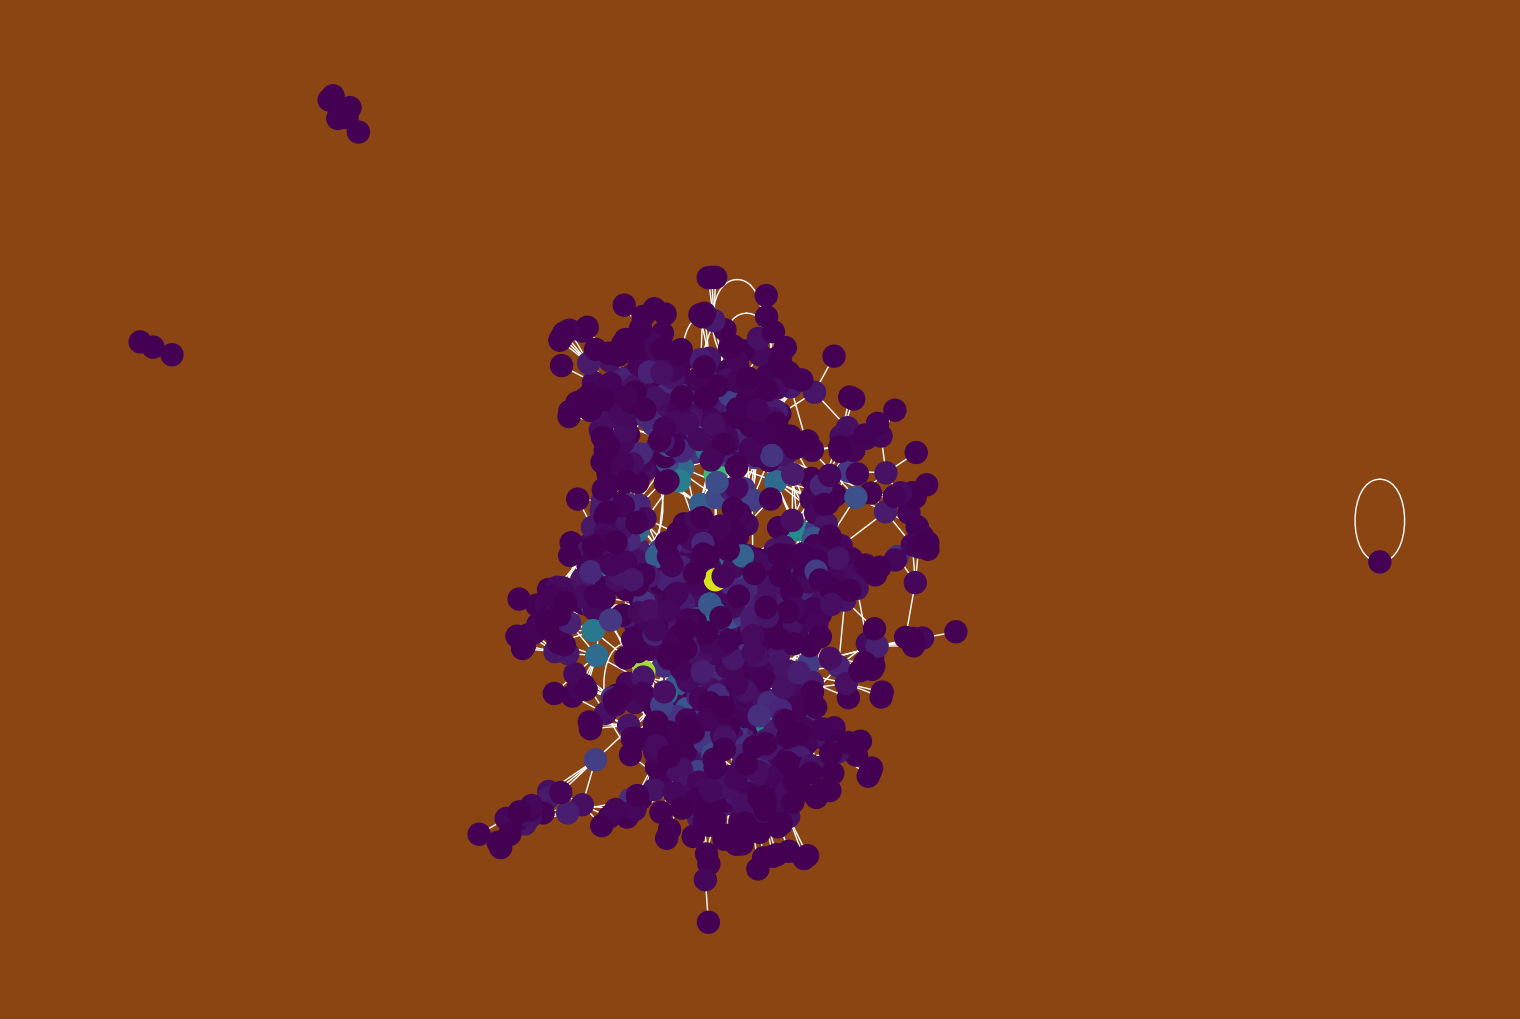

In [17]:
fig = plt.figure(figsize=(15, 10))

centrality = nx.betweenness_centrality(graph)
colors = list(centrality.values())

nx.draw(graph, 
        node_size=250,
        node_color=colors,
        edge_color='white')
fig.set_facecolor('SaddleBrown')

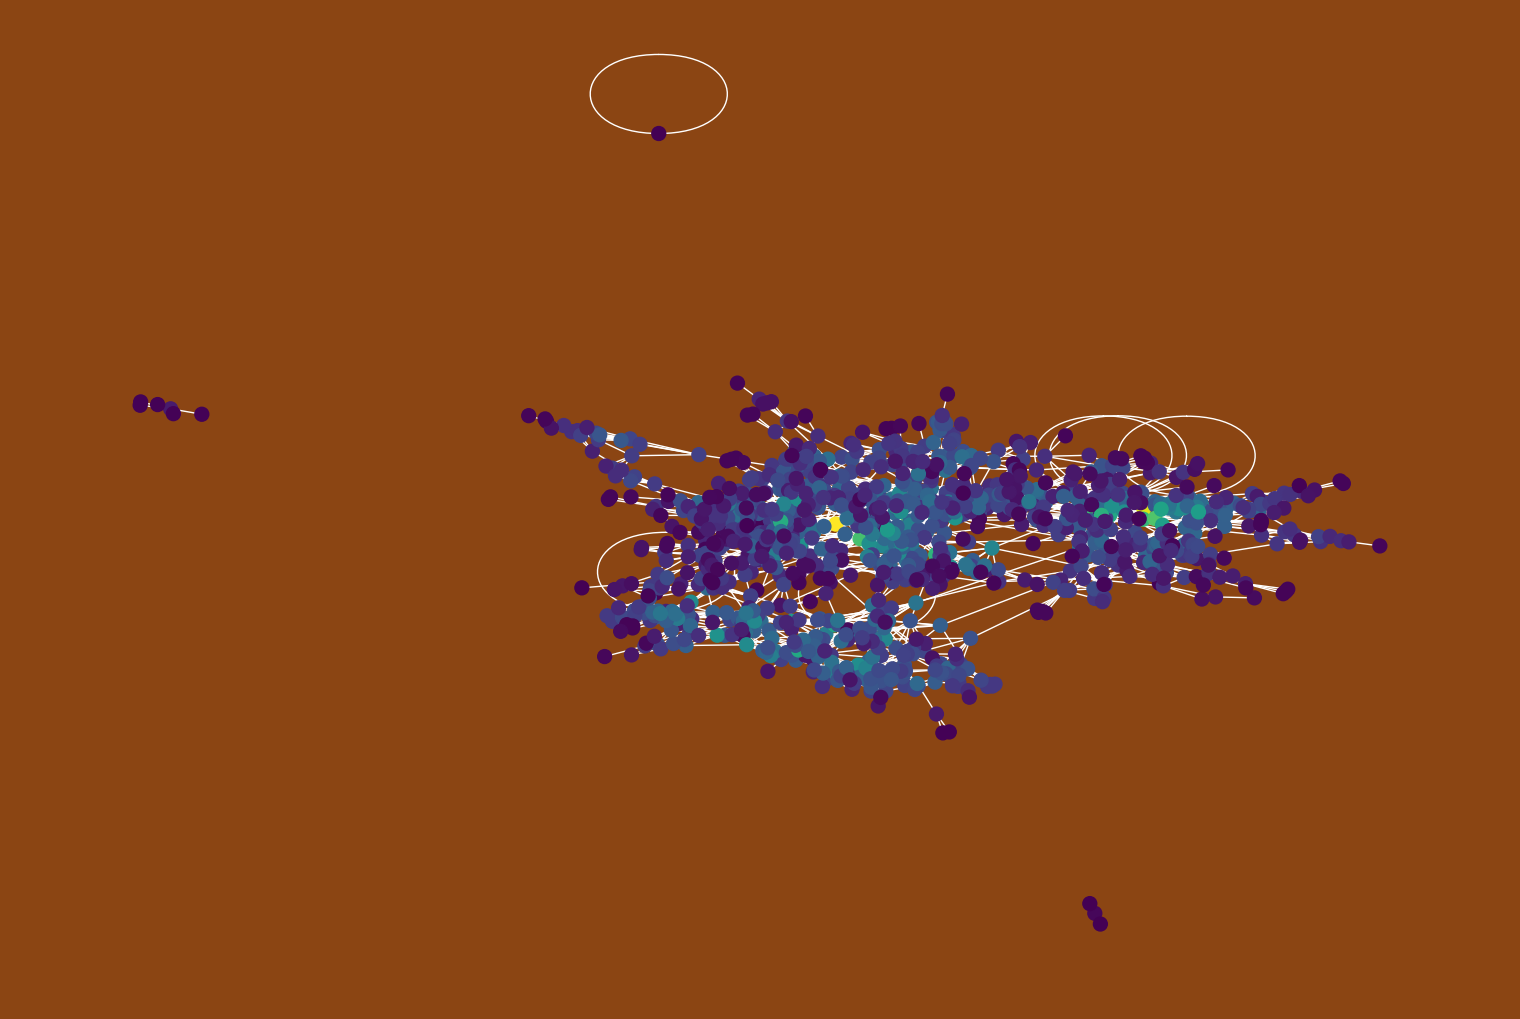

In [18]:
fig = plt.figure(figsize=(15, 10))

centrality = nx.katz_centrality(graph)
colors = list(centrality.values())

nx.draw(graph, 
        node_size=100,
        node_color=colors,
        edge_color='white')
fig.set_facecolor('SaddleBrown')

# Task 4 Generate random graphs

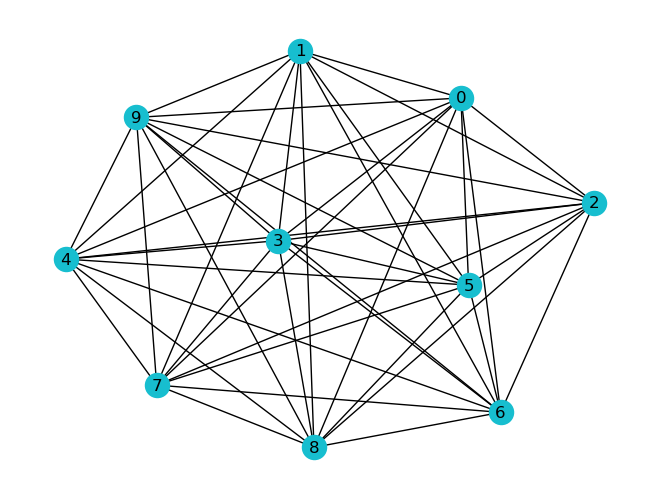

In [19]:
G = nx.complete_graph(10)
nx.draw(G,node_color='C9',with_labels=True)

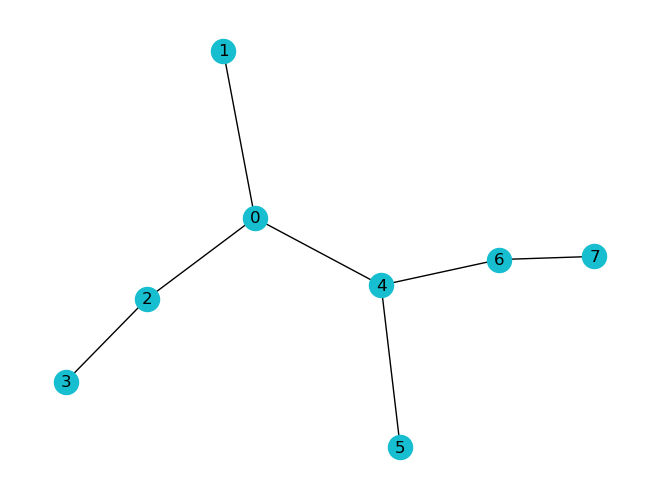

In [20]:
G = nx.binomial_tree(3)
nx.draw(G,node_color='C9',with_labels=True)

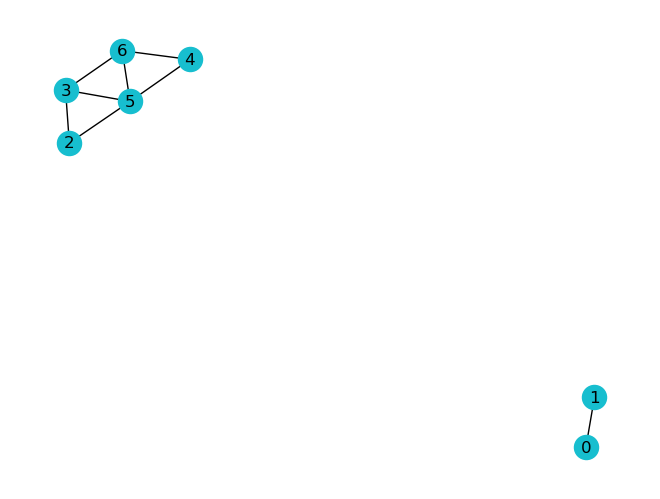

In [21]:
G = nx.binomial_graph(7,0.5)
nx.draw(G,node_color='C9',with_labels=True)

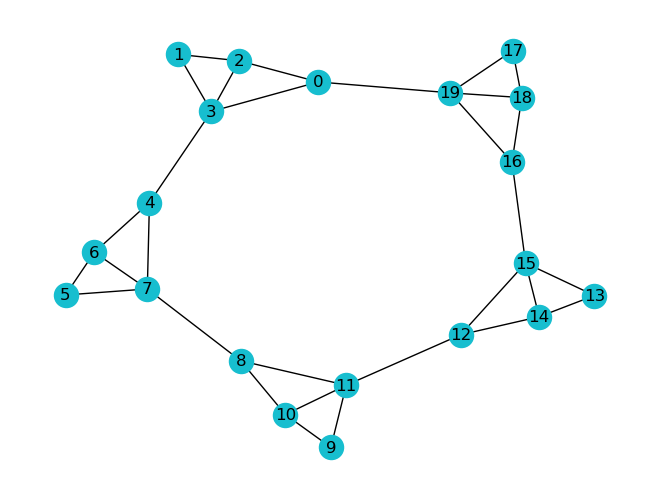

In [22]:
G = nx.connected_caveman_graph(5,4)
nx.draw(G,node_color='C9',with_labels=True)

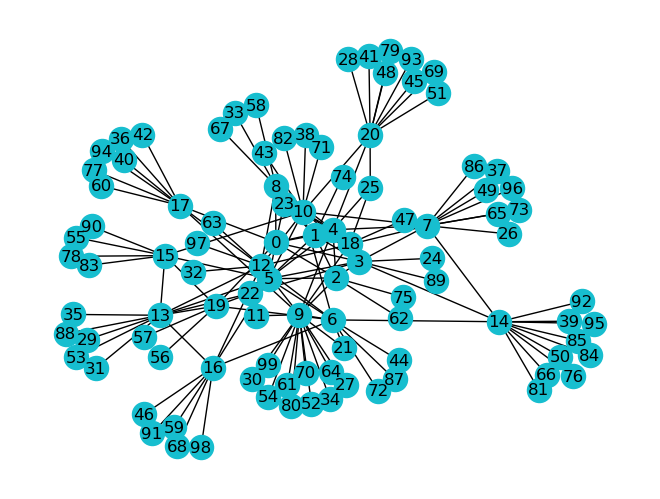

In [23]:
G = nx.random_internet_as_graph(100)
nx.draw(G,node_color='C9',with_labels=True)

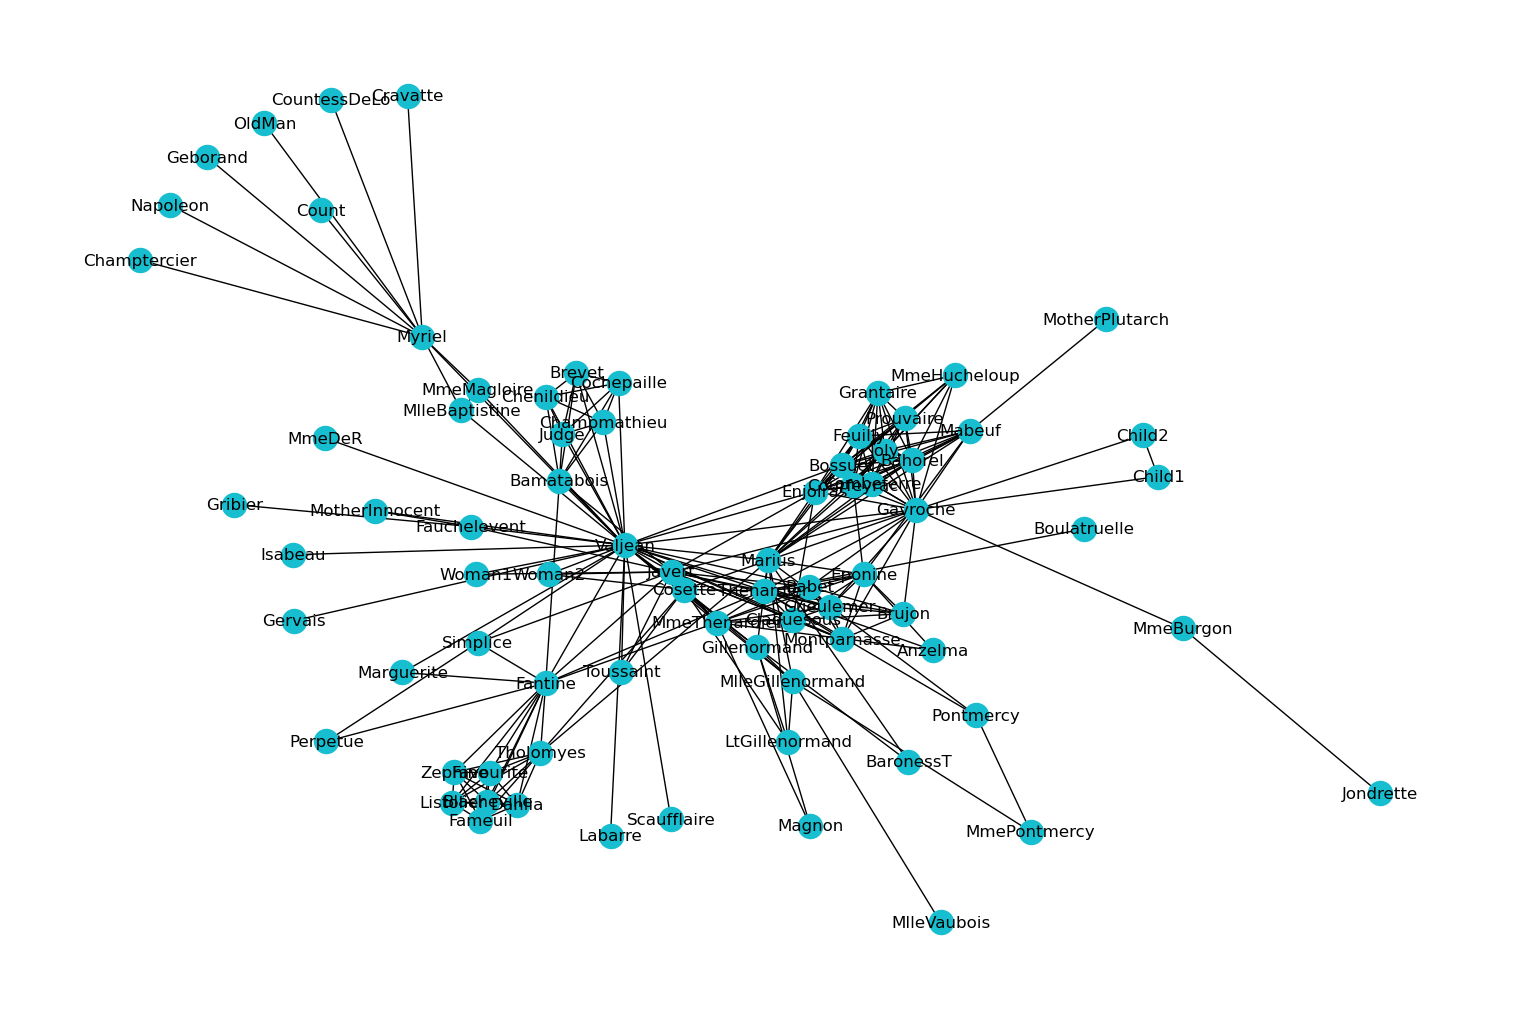

In [24]:

fig = plt.figure(figsize=(15, 10))
G = nx.les_miserables_graph()
nx.draw(G,node_color='C9',with_labels=True)

# Task 5 Add and Remove nodes and edges from graph

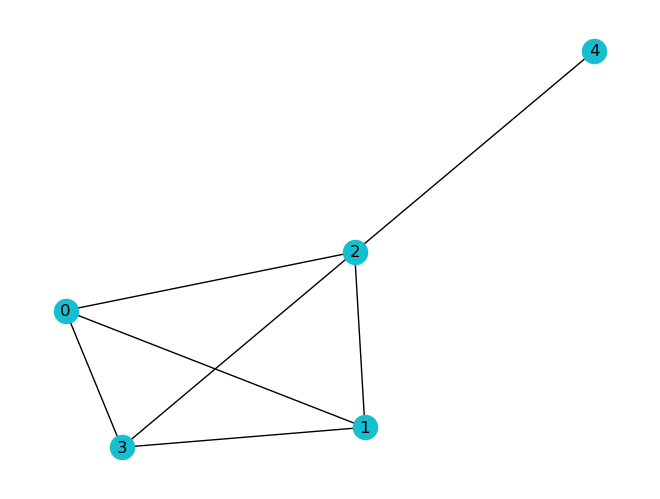

In [25]:
G = nx.random_internet_as_graph(5)
nx.draw(G,node_color='C9',with_labels=True)

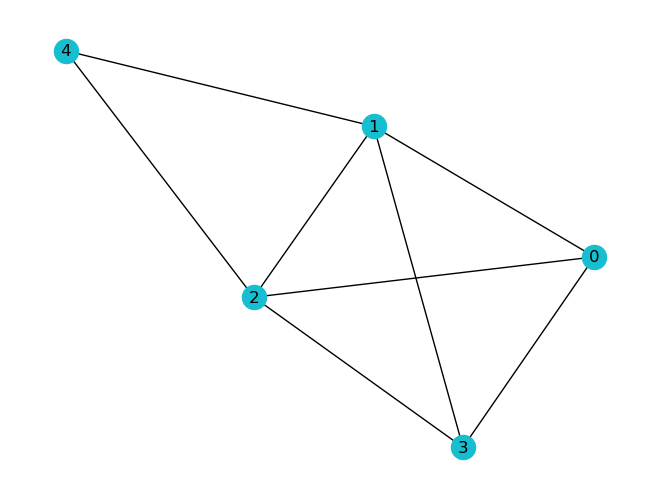

In [26]:
G.add_edge(4,1)
nx.draw(G,node_color='C9',with_labels=True)

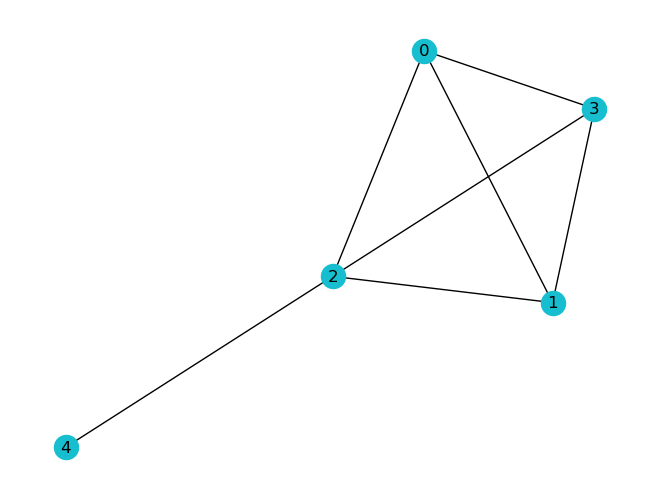

In [27]:
G.remove_edge(4,1)
nx.draw(G,node_color='C9',with_labels=True)

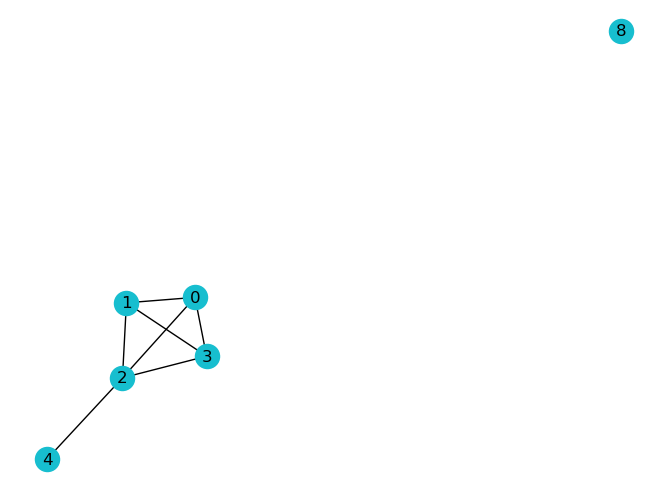

In [29]:
G.add_node(8)
nx.draw(G,node_color='C9',with_labels=True)

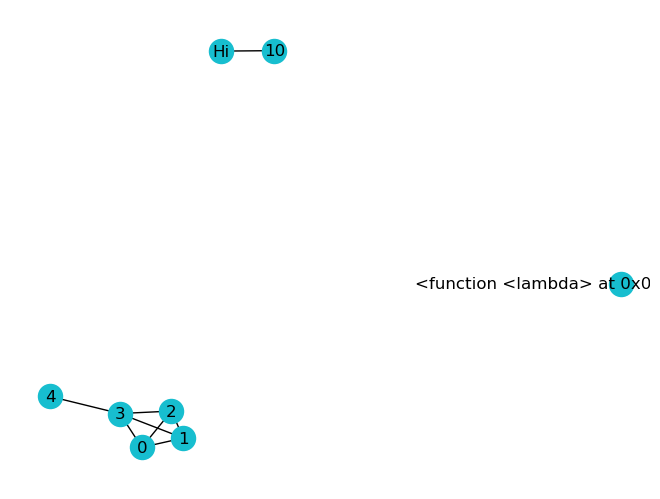

In [37]:
G = nx.random_internet_as_graph(5)
G.add_node("Hi")
G.add_node(10)
G.add_node(lambda x : x)        # you will see address of lambda function
G.add_edge("Hi",10)
nx.draw(G,node_color='C9',with_labels=True)

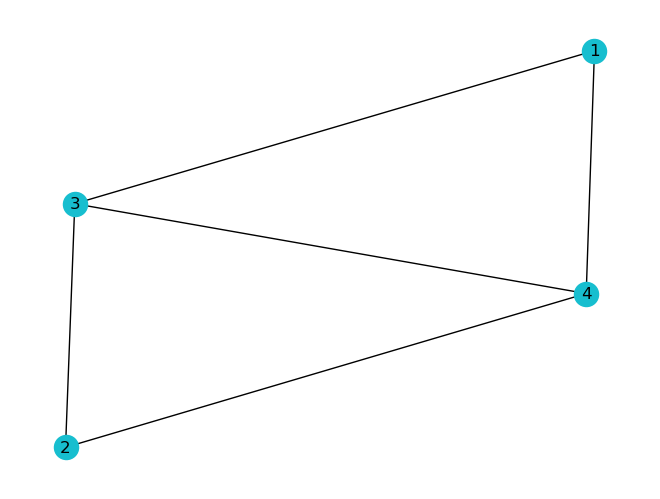

In [39]:
G = nx.Graph()
new_nodes = [1,2,3,4]
new_edges = [(1,3),(2,4),(3,4),(1,4),(2,3)]
G.add_nodes_from(new_nodes)
G.add_edges_from(new_edges)
nx.draw(G,node_color='C9',with_labels=True)

In [47]:
G1 = nx.subgraph(G,[1,3])

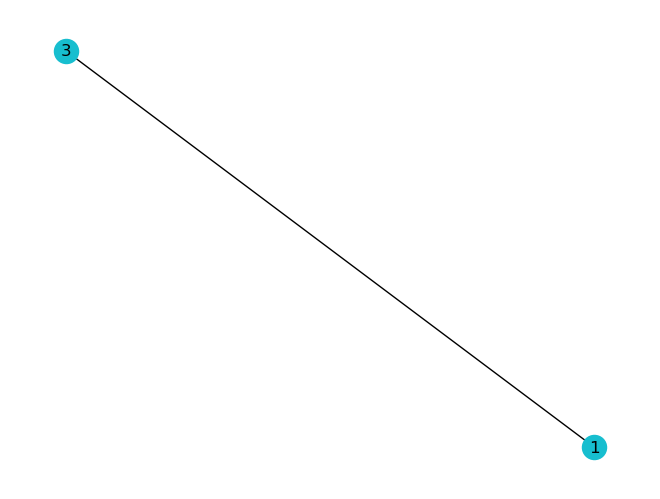

In [48]:
nx.draw(G1,node_color='C9',with_labels=True)